In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [303]:
data = 'FinancialRawCleaned.csv'
df = pd.read_csv(data)
df.head()

data2 = 'GICS sector.csv'
cat = pd.read_csv(data2)
cat = cat.rename(columns = {"Company Name" : "proper_name"})

cat.head()

,Company Symbol,proper_name,FDS Ticker Symbol,Sedol,Entity Country Incorp,MSCI Country,Curncy Iso,Value Traded,Market Value,Unnamed: 9,GICS Sub Ind Name,FactSet Ind Number,Limiting Criteria,Has Income in the last 10 qtrs,FE Rpt_Date 0,ISIN,Entity Country Incorp.1,Cash and ST Invest,Pfd Stk at Carry Value,GICS Sector Name
0,AAPL,Apple Inc.,AAPL-US,2046251,United States,United States,USD,"5,108,002,000","1,701,294.00",1,Technology Hardware Storage & Peripherals,"1,320.00",1,10,05/05/2020,US0378331005,USA,"107,230.00",0,Information Technology
1,MSFT,Microsoft Corporation,MSFT-US,2588173,United States,United States,USD,"2,759,974,000","1,689,847.00",1,Systems Software,"3,310.00",1,10,04/23/2020,US5949181045,USA,"134,253.00",0,Information Technology
2,AMZN,"Amazon.com, Inc.",AMZN-US,2000019,United States,United States,USD,"4,922,098,000","1,242,961.00",1,Internet & Direct Marketing Retail,"3,550.00",1,10,04/23/2020,US0231351067,USA,"55,342.00",0,Consumer Discretionary
3,GOOGL,Alphabet Inc. Class A,GOOGL-US,BYVY8G0,United States,United States,USD,"1,397,935,000","1,167,370.00",1,Interactive Media & Services,"3,320.00",1,10,04/22/2020,US02079K3059,USA,"119,675.00",0,Communication Services
4,FB,"Facebook, Inc. Class A",FB-US,B7TL820,United States,United States,USD,"2,100,745,000","678,943.20",1,Interactive Media & Services,"3,320.00",1,10,04/22/2020,US30303M1027,USA,"54,863.00",0,Communication Services


In [305]:
#MERGE THE TWO CSV TOGETHER
new_df = df.merge(cat,on = "proper_name",how = 'left')
new_df

,sedol,ticker_region,proper_name,currency,Market Value200703,Market Value200706,Market Value200709,Market Value200712,Market Value200803,Market Value200806,...,GICS Sub Ind Name,FactSet Ind Number,Limiting Criteria,Has Income in the last 10 qtrs,FE Rpt_Date 0,ISIN,Entity Country Incorp.1,Cash and ST Invest,Pfd Stk at Carry Value,GICS Sector Name
0,2000019,AMZN-US,"Amazon.com, Inc.",USD,16274.100,28253.300,38657.300,38538.200,29732.100,31238.600,...,Internet & Direct Marketing Retail,"3,550.00",1.0,10.0,04/23/2020,US0231351067,USA,"55,342.00",0,Consumer Discretionary
1,2002305,ABT-US,Abbott Laboratories,USD,85952.100,82759.000,82857.500,87027.500,85112.800,81655.700,...,Health Care Equipment,"2,325.00",1.0,10.0,04/15/2020,US0028241000,USA,"4,140.00",0,Health Care
2,2002479,AES-US,AES Corporation,USD,14354.100,14623.200,13403.300,14338.600,11192.700,12919.600,...,Independent Power Producers & Energy Traders,"4,705.00",1.0,10.0,05/11/2020,US00130H1059,USA,"1,765.00",888,Utilities
3,2003698,ABMD-US,"ABIOMED, Inc.",USD,440.447,349.715,404.137,506.699,430.577,597.859,...,Health Care Equipment,"2,325.00",1.0,10.0,04/30/2020,US0036541003,USA,427.5,0,Health Care
4,2005973,IBM-US,International Business Machines Corporation,USD,139960.000,143183.000,162323.000,149744.000,158142.000,160589.000,...,IT Consulting & Other Services,"3,308.00",1.0,10.0,04/20/2020,US4592001014,USA,"9,009.00",0,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,BZ12TX5,ATGE-US,Adtalem Global Education Inc.,USD,2080.470,2419.880,2631.340,3672.130,2984.570,3827.230,...,Education Services,"3,450.00",1.0,10.0,04/30/2020,US00737L1035,USA,80,0,Consumer Discretionary
378,BZ12WP8,LIN-US,Linde plc,USD,20065.500,23026.400,26460.700,27987.000,26373.800,29684.200,...,Industrial Gases,"2,210.00",1.0,10.0,05/08/2020,IE00BZ12WP82,IRL,"2,700.00",0,Materials
379,BZ19F83,WINMQ-US,"Windstream Holdings, Inc.",USD,7011.540,7046.420,6736.650,5917.590,5345.240,5424.660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380,BZ6TS23,SBAC-US,SBA Communications Corp. Class A,USD,3036.590,3482.640,3722.040,3667.580,3237.450,3813.820,...,Specialized REITs,"4,890.00",1.0,10.0,05/04/2020,US78410G1040,USA,138.6,0,Real Estate


In [306]:
list_of_companies = new_df['proper_name'].unique().tolist()


## Sales Growth by Sectors

In [307]:
ind_sales = new_df.columns.get_loc("Sales200703")
growth_df = new_df.iloc[:,0:4]

for i in range(0,43):
    col1 = ((new_df.iloc[ : , ind_sales + i + 4]/new_df.iloc[:, ind_sales + i])-1).tolist()
    growth_df['Sales Growth'+str(i+1)] = col1

growth_df["Sector"] = new_df.iloc[:,-1]
growth_df.head()

,sedol,ticker_region,proper_name,currency,Sales Growth1,Sales Growth2,Sales Growth3,Sales Growth4,Sales Growth5,Sales Growth6,...,Sales Growth35,Sales Growth36,Sales Growth37,Sales Growth38,Sales Growth39,Sales Growth40,Sales Growth41,Sales Growth42,Sales Growth43,Sector
0,2000019,AMZN-US,"Amazon.com, Inc.",USD,0.371476,0.407831,0.307174,0.181770,0.182346,0.144721,...,0.290086,0.223627,0.226105,0.248355,0.337165,0.382067,0.429187,0.393387,0.293343,Consumer Discretionary
1,2002305,ABT-US,Abbott Laboratories,USD,0.278873,0.148086,0.175789,0.100939,-0.006982,0.024727,...,0.029515,0.027949,0.296827,0.244515,0.288005,0.423026,0.166535,0.170258,0.121101,Health Care
2,2002479,AES-US,AES Corporation,USD,0.320039,0.239833,0.251801,-0.051583,-0.182992,-0.170767,...,-0.050930,0.041642,0.015456,0.085393,0.027825,-0.251489,-0.211947,-0.268588,-0.216022,Utilities
3,2003698,ABMD-US,"ABIOMED, Inc.",USD,0.263952,0.163123,0.761251,0.078426,0.118581,0.217399,...,0.348302,0.336605,0.326990,0.286160,0.290107,0.343129,0.399070,0.358894,0.368573,Health Care
4,2005973,IBM-US,International Business Machines Corporation,USD,0.112261,0.128218,0.049048,-0.064401,-0.113909,-0.133110,...,-0.002801,-0.013101,-0.028313,-0.046892,-0.003797,0.035508,0.050510,0.037016,-0.020728,Information Technology


In [308]:
avg_growth = growth_df.groupby('Sector').mean()
avg_growth

,Sales Growth1,Sales Growth2,Sales Growth3,Sales Growth4,Sales Growth5,Sales Growth6,Sales Growth7,Sales Growth8,Sales Growth9,Sales Growth10,...,Sales Growth34,Sales Growth35,Sales Growth36,Sales Growth37,Sales Growth38,Sales Growth39,Sales Growth40,Sales Growth41,Sales Growth42,Sales Growth43
Sector,,,,,,,,,,,,,,,,,,,,,
#NAME?,0.108898,0.041403,-0.120161,-0.020800,-0.125216,0.030589,1.569980,0.023048,1.014894,0.487552,...,-0.151795,-0.122329,0.060935,-0.015816,0.015179,0.130773,-0.080294,-0.003274,0.026363,-0.080973
Communication Services,0.182636,0.146432,0.281652,0.177925,0.110760,0.122344,0.093802,0.105829,0.224708,0.201986,...,0.103659,0.106095,0.075814,0.051450,0.058824,0.034974,0.116556,0.192757,0.193799,0.233846
Consumer Discretionary,0.120116,0.122146,0.096646,-0.009642,-0.101970,-0.100004,-0.034180,0.116919,0.195043,0.244005,...,0.098712,0.130388,0.116103,0.121751,0.061687,0.041554,0.053649,0.076914,0.038705,0.024236
Consumer Staples,0.063276,0.062983,0.042455,-0.073554,-0.024066,-0.039317,-0.018128,0.074645,0.074286,0.103438,...,-0.012072,-0.001234,0.017878,0.024090,0.025613,0.044683,0.040237,0.070066,0.037352,0.022755
Energy,0.412420,0.524833,0.501822,-0.051139,-0.288570,-0.407626,-0.381674,0.028993,0.354300,0.313642,...,-0.235463,-0.129670,0.048740,0.367090,0.220620,0.180780,0.209350,0.199598,0.220655,0.272853
Financials,0.074617,-0.004388,-0.094666,0.001772,-0.067267,-0.485368,0.397665,0.105269,0.078516,-0.010710,...,0.050903,0.167677,0.065504,0.100085,0.063401,0.070321,0.017155,0.085566,0.071944,0.085355
Health Care,0.288632,0.253044,0.177509,0.031063,0.005702,0.036315,0.053723,0.285493,0.787431,1.643915,...,0.201759,0.129309,0.109442,0.106155,0.075134,0.159660,0.130138,0.087082,0.826843,0.065148
Industrials,0.100709,0.137149,0.119292,-0.013145,-0.100932,-0.160084,-0.140624,-0.057399,0.046210,0.115927,...,-0.019536,0.035335,0.023511,0.071502,0.086080,0.076468,0.114510,0.105718,0.098730,0.075505
Information Technology,0.180961,0.179146,0.094182,-0.028031,-0.105358,-0.108761,-0.061165,0.132523,0.294631,0.309444,...,0.076707,0.088058,0.077002,0.110261,0.066955,0.099843,0.086917,0.090823,0.065880,0.039439


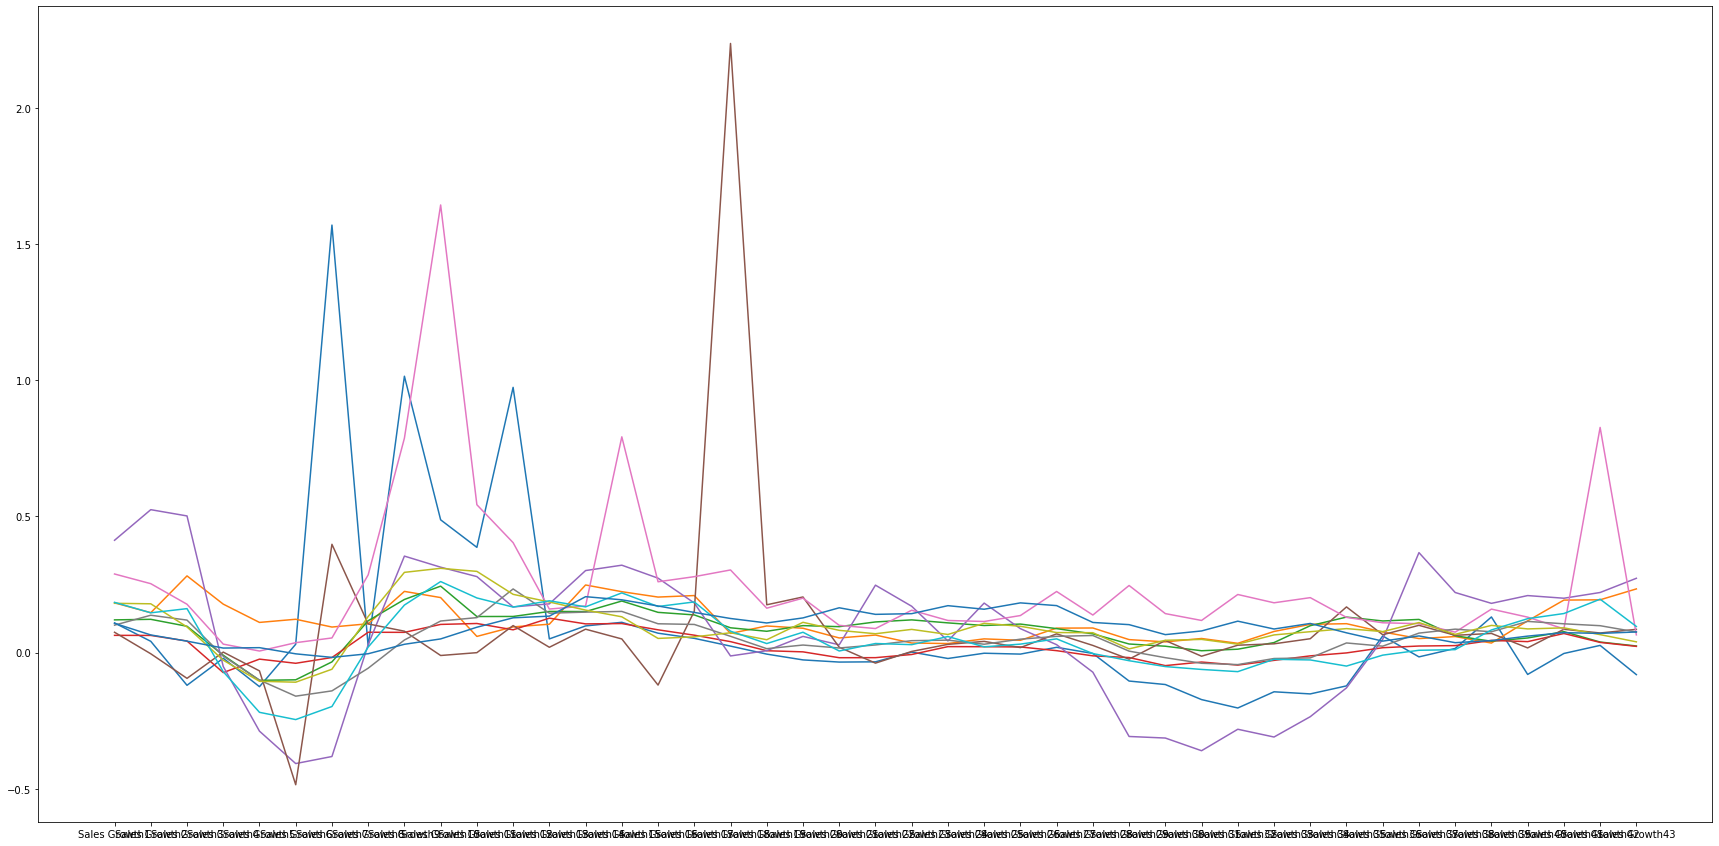

In [309]:
#x_values = avg_growth.
#x_values
plt.figure(figsize = (30,15))
for a in range(0,11):
    plt.plot(avg_growth.iloc[a])

#y_values = growth_df['Growth1']
#plt.scatter(x_values,y_values)
#plt.xlabel('Category')
#plt.ylabel('GrowthQ1-Q1')
#plt.show()

# Market Value Growth by Sectors

In [310]:
ind_mkt = new_df.columns.get_loc("Market Value200703")
mkt_df = new_df.iloc[:,0:4]

for i in range(0,43):
    col1 = ((new_df.iloc[ : , ind_mkt + i + 4]/new_df.iloc[:, ind_mkt + i])-1).tolist()
    mkt_df['Growth'+str(i+1)] = col1

mkt_df["Sector"] = new_df.iloc[:,-1]
mkt_df.head()


,sedol,ticker_region,proper_name,currency,Growth1,Growth2,Growth3,Growth4,Growth5,Growth6,...,Growth35,Growth36,Growth37,Growth38,Growth39,Growth40,Growth41,Growth42,Growth43,Sector
0,2000019,AMZN-US,"Amazon.com, Inc.",USD,0.826958,0.105662,-0.192546,-0.430492,0.059656,0.156937,...,0.656650,0.123590,0.512381,0.369795,0.165063,0.582452,0.656480,0.781601,1.113786,Consumer Discretionary
1,2002305,ABT-US,Abbott Laboratories,USD,-0.009765,-0.013331,0.078238,-0.047964,-0.133874,-0.109435,...,0.037785,-0.144616,0.253989,0.461562,0.491689,0.758923,0.363176,0.266868,0.387242,Health Care
2,2002479,AES-US,AES Corporation,USD,-0.220244,-0.116500,-0.422477,-0.619115,-0.654080,-0.400765,...,0.282818,0.200324,-0.050944,-0.108167,-0.140837,-0.066282,0.018928,0.209465,0.274094,Utilities
3,2003698,ABMD-US,"ABIOMED, Inc.",USD,-0.022409,0.709561,0.608056,0.188856,-0.582511,-0.448964,...,0.416099,0.279601,0.353927,0.343897,0.337485,0.692416,1.361565,1.905997,1.718105,Health Care
4,2005973,IBM-US,International Business Machines Corporation,USD,0.129909,0.121565,-0.031986,-0.247396,-0.190411,-0.147625,...,0.073992,0.181341,0.125308,-0.011842,-0.110757,-0.098876,-0.139116,-0.110533,0.023117,Information Technology


In [311]:
avg_mkt = mkt_df.groupby('Sector').mean()
avg_mkt.head()

,Growth1,Growth2,Growth3,Growth4,Growth5,Growth6,Growth7,Growth8,Growth9,Growth10,...,Growth34,Growth35,Growth36,Growth37,Growth38,Growth39,Growth40,Growth41,Growth42,Growth43
Sector,,,,,,,,,,,,,,,,,,,,,
#NAME?,-0.100327,-0.050917,-0.490996,-0.580461,-0.529237,-0.513402,0.021472,0.651221,0.439078,-0.172927,...,-0.097777,-0.110034,0.412065,0.312103,0.013475,0.289580,-0.244293,-0.479484,-0.260005,-0.412436
Communication Services,-0.127947,-0.160709,-0.208802,-0.460708,-0.390170,-0.258012,0.112551,0.757657,1.679729,0.694740,...,0.035172,0.131535,0.082713,0.213548,0.199913,0.174866,0.183917,0.120058,0.187121,0.257810
Consumer Discretionary,0.052746,-0.207985,-0.252897,-0.422956,-0.417234,-0.070425,0.205620,0.950927,1.777277,0.445593,...,-0.005250,0.149739,0.026546,0.098331,0.172973,0.085169,0.176861,0.055111,-0.023815,-0.032022
Consumer Staples,-0.103864,-0.183151,-0.131063,-0.289675,-0.262836,-0.112734,-0.097195,0.179909,0.499926,0.242186,...,0.164751,0.117189,-0.041951,0.026653,-0.005598,0.019702,0.191480,0.042157,-0.029317,0.021213
Energy,0.354814,0.529612,-0.041251,-0.430160,-0.471135,-0.492969,-0.101820,0.499557,0.633180,0.206484,...,-0.146546,0.242826,0.473204,0.285358,-0.049472,-0.048682,-0.043932,-0.040261,0.382966,0.304210


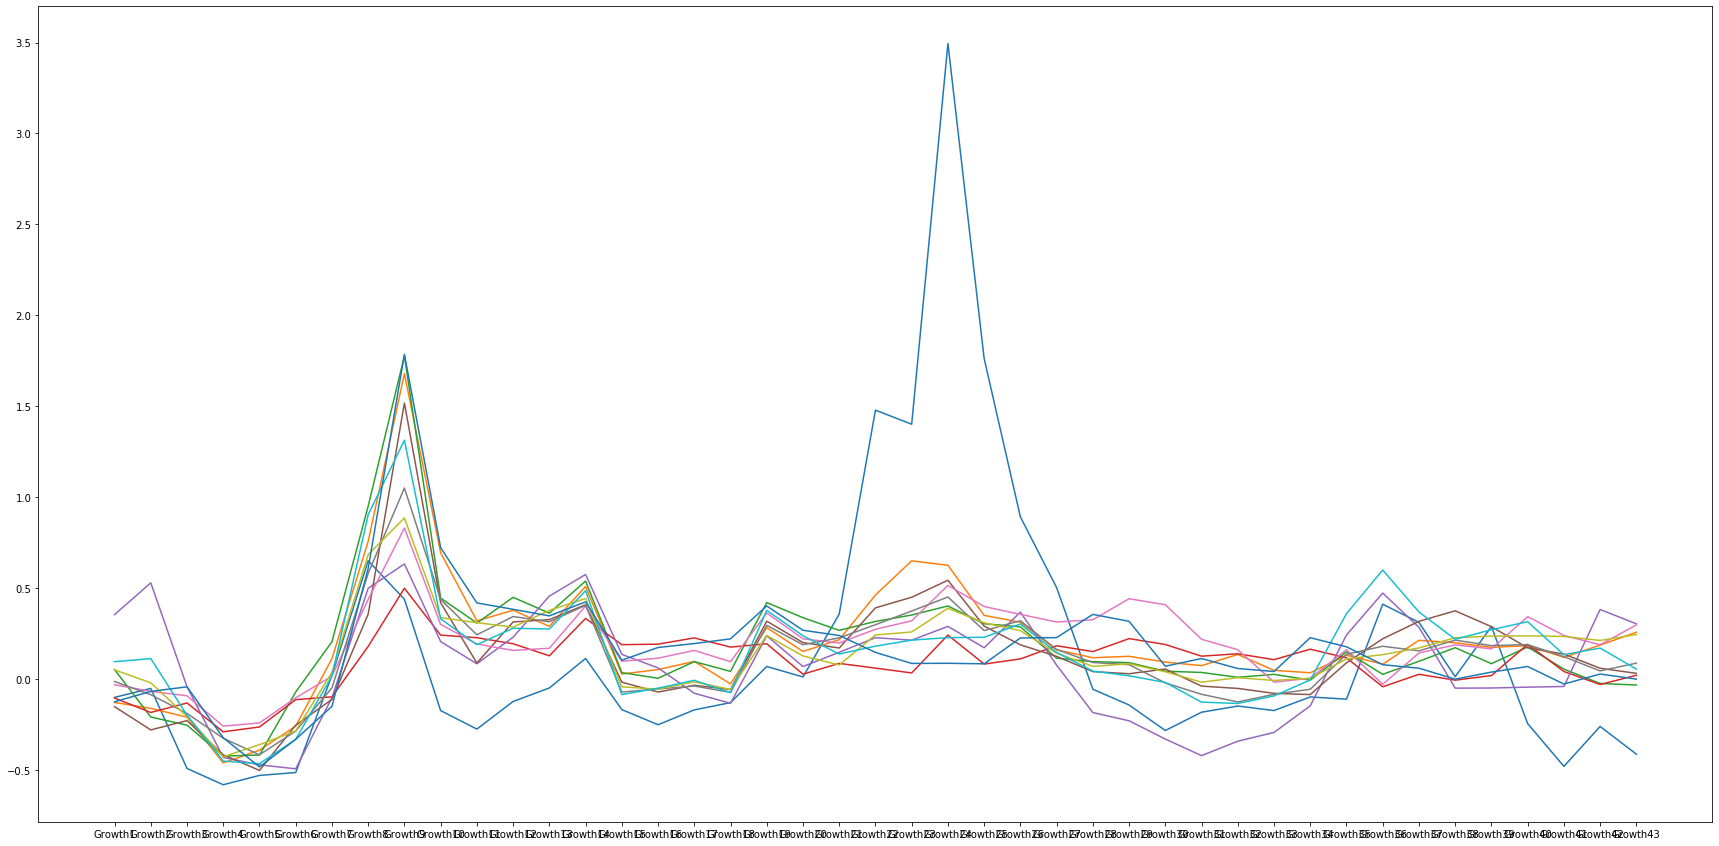

In [312]:
plt.figure(figsize = (30,15))

for a in range(0,11):
    plt.plot(avg_mkt.iloc[a])


## Scatter Plot by Company

Not too many stuff

In [313]:
growth_df.head()

,sedol,ticker_region,proper_name,currency,Sales Growth1,Sales Growth2,Sales Growth3,Sales Growth4,Sales Growth5,Sales Growth6,...,Sales Growth35,Sales Growth36,Sales Growth37,Sales Growth38,Sales Growth39,Sales Growth40,Sales Growth41,Sales Growth42,Sales Growth43,Sector
0,2000019,AMZN-US,"Amazon.com, Inc.",USD,0.371476,0.407831,0.307174,0.181770,0.182346,0.144721,...,0.290086,0.223627,0.226105,0.248355,0.337165,0.382067,0.429187,0.393387,0.293343,Consumer Discretionary
1,2002305,ABT-US,Abbott Laboratories,USD,0.278873,0.148086,0.175789,0.100939,-0.006982,0.024727,...,0.029515,0.027949,0.296827,0.244515,0.288005,0.423026,0.166535,0.170258,0.121101,Health Care
2,2002479,AES-US,AES Corporation,USD,0.320039,0.239833,0.251801,-0.051583,-0.182992,-0.170767,...,-0.050930,0.041642,0.015456,0.085393,0.027825,-0.251489,-0.211947,-0.268588,-0.216022,Utilities
3,2003698,ABMD-US,"ABIOMED, Inc.",USD,0.263952,0.163123,0.761251,0.078426,0.118581,0.217399,...,0.348302,0.336605,0.326990,0.286160,0.290107,0.343129,0.399070,0.358894,0.368573,Health Care
4,2005973,IBM-US,International Business Machines Corporation,USD,0.112261,0.128218,0.049048,-0.064401,-0.113909,-0.133110,...,-0.002801,-0.013101,-0.028313,-0.046892,-0.003797,0.035508,0.050510,0.037016,-0.020728,Information Technology


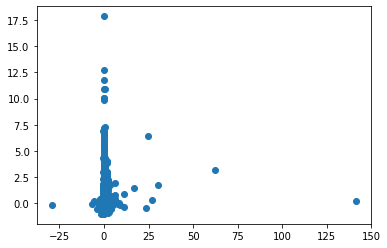

In [314]:
growth_arr = growth_df.iloc[:,4:47].to_numpy()
mkt_arr = mkt_df.iloc[:,4:47].to_numpy()

plt.scatter(growth_arr, mkt_arr)


In [315]:
growth_tbl = growth_df.iloc[:,4:47]
growth_ser = pd.Series(growth_tbl.values.ravel('F'))

In [316]:
mkt_tbl = mkt_df.iloc[:,4:47]
mkt_ser = pd.Series(mkt_tbl.values.ravel('F'))

In [317]:
gro_1 = growth_ser.to_frame()
gro_1.columns = ["sales"]

mkt_1 = mkt_ser.to_frame()
mkt_1.columns = ["mkt"]
data_scatter = pd.merge(gro_1,mkt_1,how = 'outer',left_index = True, right_index = True)

#FIND QUANTILE and ELIMNATE OUTLIERS

quant = pd.DataFrame(data_scatter)['sales'].quantile([.25,.5,.75])

upper = quant[0.75]
lower = quant[0.25]
iqr = upper - lower
upper_b = upper + 1.5*iqr
lower_b = lower - 1.5*iqr

print(upper_b)
print(lower_b)


for a in data_scatter['sales']:
    if a < lower_b or a > upper_b:
      data_scatter = data_scatter.drop(data_scatter.loc[data_scatter['sales']==a].index[0])
data_scatter

0.3748765515945383
-0.2724318295919551


,sales,mkt
0,0.371476,0.826958
1,0.278873,-0.009765
2,0.320039,-0.220244
3,0.263952,-0.022409
4,0.112261,0.129909
...,...,...
16420,0.118163,0.034254
16422,0.034908,0.156438
16423,-0.051479,-0.350669
16424,0.076683,0.075699


0.7244257709618985


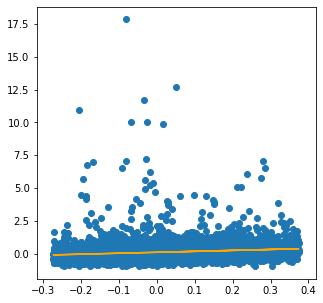

In [318]:
x = data_scatter['sales']
y = data_scatter['mkt']

plt.figure(figsize = (5,5))

plt.scatter(x,y)
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,color = "orange")

print(m)

In [325]:
np.corrcoef(x, y)

array([[1.        , 0.16947259],
       [0.16947259, 1.        ]])

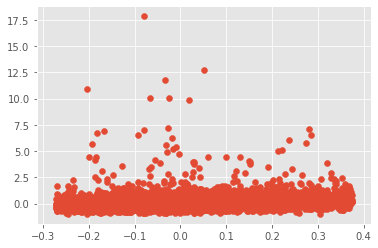

In [328]:
plt.style.use('ggplot')

plt.scatter(x, y)
plt.show()

### T TEST

- homogeneous
- independent
- 

